In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.parsing.porter import PorterStemmer
%matplotlib inline

## Agenda
- Missing value treatment
- PCA
- Pandas functions
    - apply method can be used along with more than two columns
    - Append data row-wise 
- Python
    - Class
    - Execute python files from command prompt
- Exercises 

## Missing value treatment

In [4]:
df = pd.DataFrame({
    'A': np.random.randint(1,10,5),
    'B': [10, 20, 30, None, 50, ],
    'C': ['a', 'b', 'c', 'a', None]
})
df

,A,B,C
0,7,10.0,a
1,9,20.0,b
2,1,30.0,c
3,7,NaN,a
4,5,50.0,None


In [5]:
df.dropna()

,A,B,C
0,7,10.0,a
1,9,20.0,b
2,1,30.0,c


#### Missing value imputation
- Simple imputing
    - Numerical columns
        - mean, median, forward & backward filling
    - Non-numerical columns
        - mode
- Grouping filling(take help from other columns)
- Machine learning models
    - KNN
    - Hybrid

In [11]:
#### Columnwise no. of missing values
df.isna().sum()

A    0
B    1
C    1
dtype: int64

In [15]:
# column wise missing values
df.isna().sum() / df.shape[0] * 100

A     0.0
B    20.0
C    20.0
dtype: float64

In [14]:
### % of missing values in your dataframe
df.isna().sum().sum() / (df.shape[0]*df.shape[1]) * 100

13.333333333333334

In [17]:
#!pip install missingno

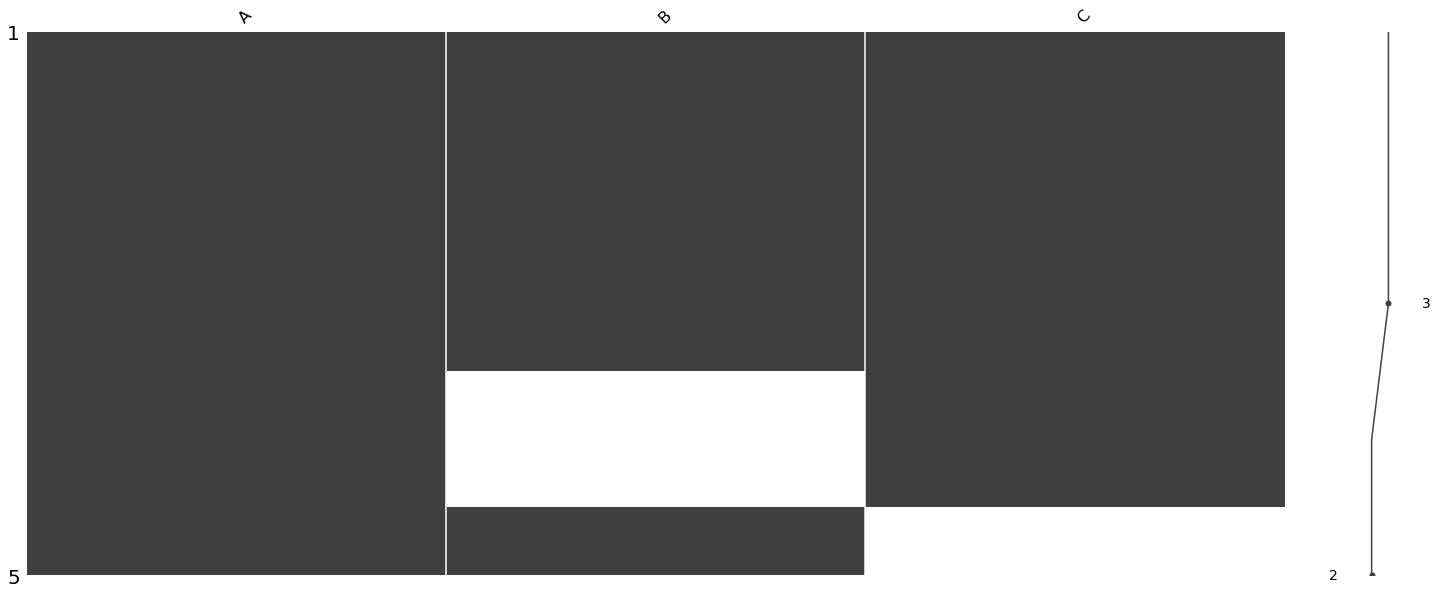

In [18]:
import missingno
missingno.matrix(df)

In [22]:
url = 'https://github.com/skathirmani/datasets/raw/master/parliament.csv'
parliament = pd.read_csv(url)

In [24]:
parliament.isna().sum() / parliament.shape[0] * 100

YEAR         0.000000
STATE        0.000000
PC           0.000000
NAME         0.000000
SEX          4.628320
PARTY        0.000000
AGE         81.976511
CATEGORY    81.976511
VOTES        0.000000
ELECTORS     7.253437
Position     0.000000
dtype: float64

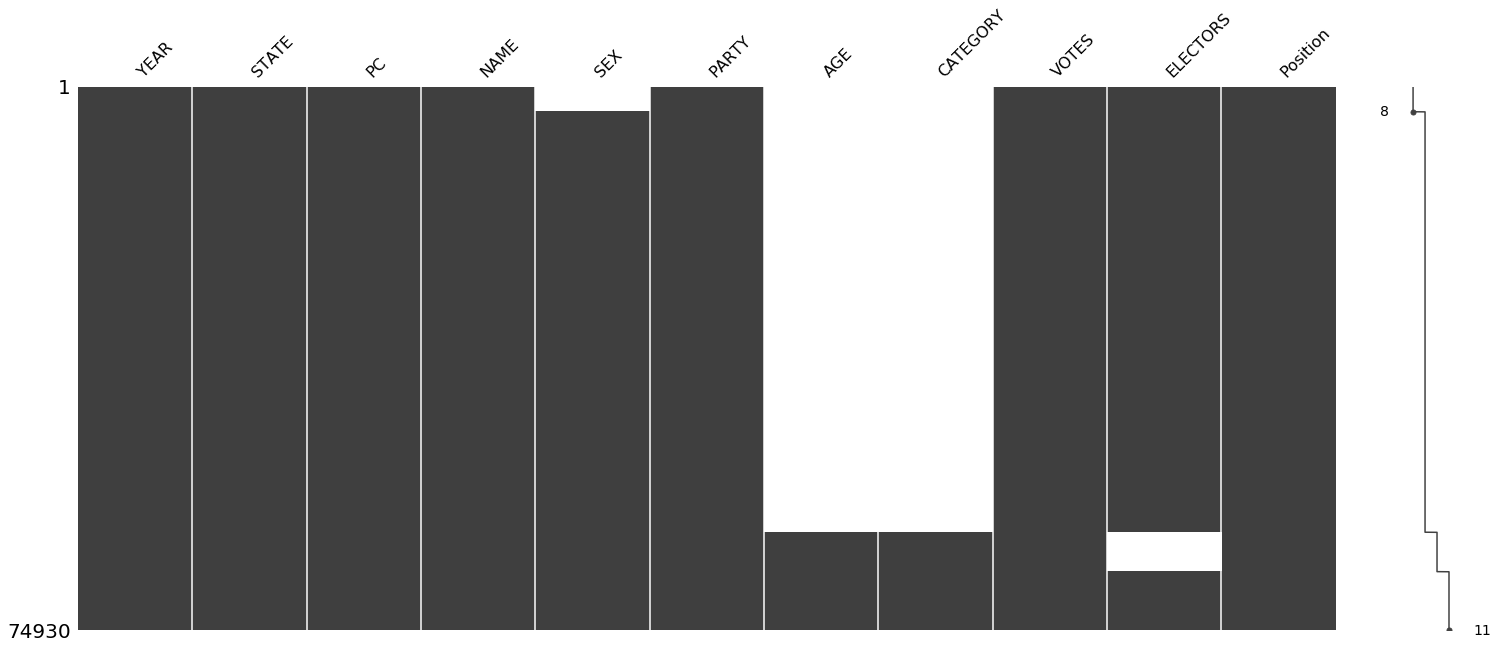

In [25]:
missingno.matrix(parliament)

In [26]:
### Simple imputation
df

,A,B,C
0,7,10.0,a
1,9,20.0,b
2,1,30.0,c
3,7,NaN,a
4,5,50.0,None


In [35]:
df['B_1'] = df['B'].fillna(df['B'].mean())
df['C_1'] = df['C'].fillna(df['C'].mode().values[0])
df

,A,B,C,B_1,C_1
0,7,10.0,a,10.0,a
1,9,20.0,b,20.0,b
2,1,30.0,c,30.0,c
3,7,NaN,a,27.5,a
4,5,50.0,None,50.0,a


In [37]:
df['B_ffill'] = df['B'].fillna(method='ffill')
df['B_bfill'] = df['B'].fillna(method='bfill')
df

,A,B,C,B_1,C_1,B_2,B_ffill,B_bfill
0,7,10.0,a,10.0,a,10.0,10.0,10.0
1,9,20.0,b,20.0,b,20.0,20.0,20.0
2,1,30.0,c,30.0,c,30.0,30.0,30.0
3,7,NaN,a,27.5,a,30.0,30.0,50.0
4,5,50.0,None,50.0,a,50.0,50.0,50.0


In [39]:
df['B_interpolate'] = df['B'].interpolate()
df

,A,B,C,B_1,C_1,B_2,B_ffill,B_bfill,B_interpolate
0,7,10.0,a,10.0,a,10.0,10.0,10.0,10.0
1,9,20.0,b,20.0,b,20.0,20.0,20.0,20.0
2,1,30.0,c,30.0,c,30.0,30.0,30.0,30.0
3,7,NaN,a,27.5,a,30.0,30.0,50.0,40.0
4,5,50.0,None,50.0,a,50.0,50.0,50.0,50.0


In [42]:
parliament['ELECTORS'].isna().sum()

5435

In [44]:
parliament[(parliament['PC'] == 'AJMER NORTH') & 
           (parliament['YEAR'] == 1951)]

,YEAR,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,Position
0,1951,AJMER,AJMER NORTH,JAWALA PRASHAD,NaN,INC,NaN,NaN,46679,162327.0,1
1,1951,AJMER,AJMER NORTH,CHAND KARAN,NaN,BJS,NaN,NaN,28990,162327.0,2
2,1951,AJMER,AJMER NORTH,DINO MAL,NaN,PURP,NaN,NaN,10778,162327.0,3
3,1951,AJMER,AJMER NORTH,BAJORIA BADRIDAS,NaN,IND,NaN,NaN,6153,162327.0,4
4,1951,AJMER,AJMER NORTH,RANG RAJ MEHTA,NaN,IND,NaN,NaN,4565,162327.0,5


In [45]:
parliament['ELECTORS'].isna().sum()

5435

## Principal Component Analysis (PCA)

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/ellipse.csv'
df = pd.read_csv(url)
scaler = StandardScaler().fit(df)
df_scaled = pd.DataFrame(scaler.transform(df),
                         columns=df.columns,
                         index=df.index)
df_scaled.head()

,x,y
0,1.160994,1.311131
1,1.152883,1.316316
2,1.144658,1.321369
3,1.136317,1.326289
4,1.127863,1.331077


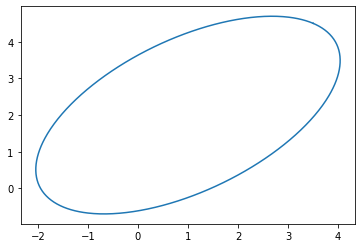

In [73]:
plt.plot(df['x'], df['y'])

In [50]:
from sklearn.decomposition import PCA


In [ ]:
# correlation matrix of data
# eigen values & eigen vectors for your correlation matrix
# dot product b/w scaled data & evectors

In [93]:
inp = [[1,2,3], [2,4,6], [3,6,9]]
evalues, evectors = np.linalg.eig(inp)
evalues

array([ 1.40000000e+01,  2.58591657e-16, -5.28378741e-16])

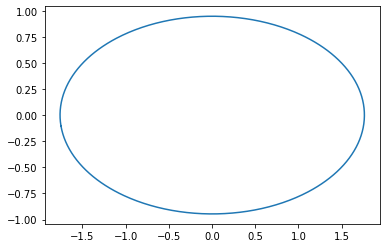

In [80]:
pca_model = PCA(n_components=2).fit(df_scaled)
pcs = pca_model.transform(df_scaled)
pcs = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
plt.plot(pcs['PC1'], pcs['PC2'])

In [88]:
corr_matrix = df_scaled.corr()
evalues, evectors = np.linalg.eig(corr_matrix)
np.dot(df_scaled, evectors)

array([[1.74805631, 0.10616335],
       [1.74598745, 0.1155642 ],
       [1.7437438 , 0.12495348],
       ...,
       [1.75217951, 0.08432791],
       [1.75051666, 0.09375196],
       [1.74867857, 0.10316662]])

In [89]:
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,-2.588117e-16
PC2,-2.588117e-16,1.000000e+00


In [90]:
evalues

array([1.552432, 0.447568])

In [91]:
pcs.var()

PC1    1.554904
PC2    0.448281
dtype: float64

In [94]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/data_pca.csv'
sensors = pd.read_csv(url)
sensors.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor41,Sensor42,Sensor43,Sensor44,Sensor45,Sensor46,Sensor47,Sensor48,Sensor49,Sensor50
0,23.33984,23.33984,23.63281,23.63281,23.53516,23.33984,22.94922,23.04688,23.14453,23.14453,...,23.53516,23.14453,23.24219,23.53516,23.73047,23.63281,23.43750,22.94922,22.94922,23.04688
1,23.33984,23.33984,23.73047,23.63281,23.53516,23.43750,23.04688,23.14453,23.24219,23.24219,...,23.43750,23.14453,23.14453,23.53516,23.73047,23.63281,23.53516,23.04688,22.94922,23.04688
2,23.43750,23.43750,23.63281,23.63281,23.53516,23.33984,22.94922,23.14453,23.24219,23.24219,...,23.53516,23.24219,23.24219,23.63281,23.73047,23.73047,23.53516,23.24219,23.04688,23.04688
3,23.33984,23.33984,23.63281,23.63281,23.53516,23.33984,22.94922,23.14453,23.24219,23.24219,...,23.53516,23.14453,23.33984,23.63281,23.73047,23.73047,23.43750,23.04688,23.04688,23.04688
4,23.43750,23.43750,23.73047,23.73047,23.63281,23.43750,23.04688,23.24219,23.24219,23.24219,...,23.53516,23.24219,23.33984,23.63281,23.73047,23.63281,23.53516,22.94922,23.04688,23.14453


In [96]:
scaler = StandardScaler().fit(sensors)
sensors_scaled = pd.DataFrame(scaler.transform(sensors),
                         columns=sensors.columns,
                         index=sensors.index)

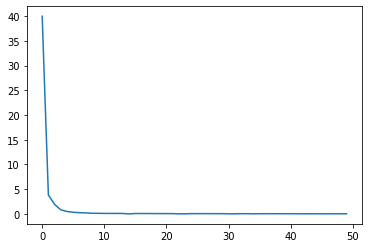

In [98]:
corr_matrix = sensors_scaled.corr()

evalues, evectors = np.linalg.eig(corr_matrix)
plt.plot(evalues)

In [106]:
#evalues.cumsum()/sum(evalues)
evalues

array([3.99631174e+01, 3.82787291e+00, 1.92054906e+00, 8.24963784e-01,
       4.96783332e-01, 3.27546052e-01, 2.47969344e-01, 2.08158544e-01,
       1.32220707e-01, 1.19546477e-01, 1.02443193e-01, 1.01424781e-01,
       9.89699230e-02, 9.11426503e-02, 3.34280016e-16, 8.49546534e-02,
       7.83831135e-02, 7.39401675e-02, 6.92763536e-02, 6.56282807e-02,
       6.21113884e-02, 6.08690454e-02, 1.80008137e-02, 1.94791308e-02,
       5.70684494e-02, 5.56288907e-02, 5.49733216e-02, 5.41435689e-02,
       5.28382703e-02, 5.18549615e-02, 2.14840034e-02, 2.26410431e-02,
       4.80527737e-02, 4.63806758e-02, 2.36227223e-02, 4.39259055e-02,
       4.24066260e-02, 4.11499125e-02, 3.99591425e-02, 3.94418918e-02,
       3.69244032e-02, 3.49407785e-02, 2.61868820e-02, 2.69304296e-02,
       3.30066397e-02, 2.87768980e-02, 2.94210383e-02, 3.00254718e-02,
       3.11734238e-02, 3.16907334e-02])

In [107]:
pca_model = PCA(n_components=7)

In [105]:
pca_model = PCA(n_components=7).fit(sensors_scaled)
df_pcs = pd.DataFrame(pca_model.transform(sensors_scaled))
df_pcs.var()

0    40.002724
1     3.831667
2     1.922452
3     0.825781
4     0.497276
5     0.327870
6     0.248215
dtype: float64

In [111]:
df.head()

,x,y
0,3.500000,4.500000
1,3.482555,4.509875
2,3.464861,4.519499
3,3.446921,4.528871
4,3.428737,4.537990


In [125]:
df.shape

(629, 2)

## Class

In [122]:
class data_explorer:
    def __init__(self, data):
        self.data = data
        self.x  = 10 
    
    def get_data_types(self):
        return {'numerics': self.data._get_numeric_data().columns.tolist(),
                'categories': [],
                'dates': [],
                'texts': [],
                'geographical': []}
    def get_correlated_metrics(self, thresh=0.6):
        df = self.data
        corr_matrix = df.corr()
        thresh=0.6
        df_corr = pd.DataFrame(np.tril(corr_matrix, -1),
                              columns=corr_matrix.columns,
                              index=corr_matrix.index)
        df_corr_melted = df_corr.reset_index().melt(id_vars='index')
        df_corr_melted = df_corr_melted[df_corr_melted['value']>= thresh]
        df_corr_melted = df_corr_melted.rename(columns={'index': 'col1',
                                                        'variable': 'col2',
                                                        'value': 'corr'})
        df_corr_melted = df_corr_melted.reset_index(drop=True)
        return df_corr_melted
    
analyzer = data_explorer(df)

In [117]:
analyzer.get_data_types()

{'numerics': ['x', 'y'],
 'categories': [],
 'dates': [],
 'texts': [],
 'geographical': []}

In [123]:
analyzer = data_explorer(parliament)
analyzer.get_data_types()

{'numerics': ['YEAR', 'AGE', 'VOTES', 'ELECTORS', 'Position'],
 'categories': [],
 'dates': [],
 'texts': [],
 'geographical': []}

In [124]:
analyzer.get_correlated_metrics()

,col1,col2,corr
0,ELECTORS,YEAR,0.763377


In [126]:
import auto_eda

In [128]:
insurance = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/insurance.csv')
analyzer = auto_eda.data_explorer(insurance)

In [129]:
analyzer.get_anova_results()

,categorical,numerical
0,region,bmi
1,sex,expenses
2,smoker,expenses


In [130]:
analyzer.get_correlated_metrics()

,col1,col2,corr


In [ ]:
# handle error
#try:
#except:
# debugging: pdb

In [146]:
class new_data_explorer(auto_eda.data_explorer):
    def get_data_types(self):
        return {'numerics': self.df._get_numeric_data().columns.tolist(),
                'categories': [],
                'dates': [],
                'texts': [],
                'geographical': []}

In [147]:
analyzer = new_data_explorer(insurance)

In [148]:
analyzer.get_data_types()

{'numerics': ['age', 'bmi', 'children', 'expenses'],
 'categories': [],
 'dates': [],
 'texts': [],
 'geographical': []}

In [149]:
class new_dataframe(pd.DataFrame):
    @property
    def get_data_types(self):
        return {'numerics': [1,2,3]}

In [152]:
type(insurance)

pandas.core.frame.DataFrame

In [151]:
df = new_dataframe(insurance)
type(df)

__main__.new_dataframe

In [153]:
df.get_data_types

{'numerics': [1, 2, 3]}